In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("winemag-data-130k-v2.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [27]:
df.dtypes.to_frame()

,0
Unnamed: 0,int64
country,object
description,object
designation,object
points,int64
price,float64
province,object
region_1,object
region_2,object
taster_name,object


In [29]:
df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [ ]:
# Number of Wine Tasted According To Countries (Top 10)
# country: The country that the wine is from

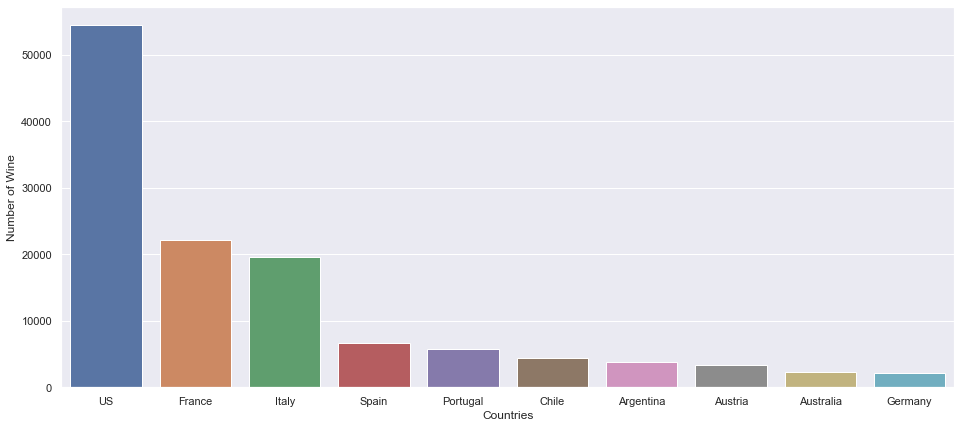

In [6]:
plt.figure(figsize=(16,7))
sns.set(style="darkgrid")
sns.barplot(x=df.country.value_counts()[:10].index, y=df.country.value_counts()[:10].values)
plt.xlabel("Countries")
plt.ylabel("Number of Wine")
plt.show()

In [7]:
# Points / Price Ratio (Top 10)
# points: The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)

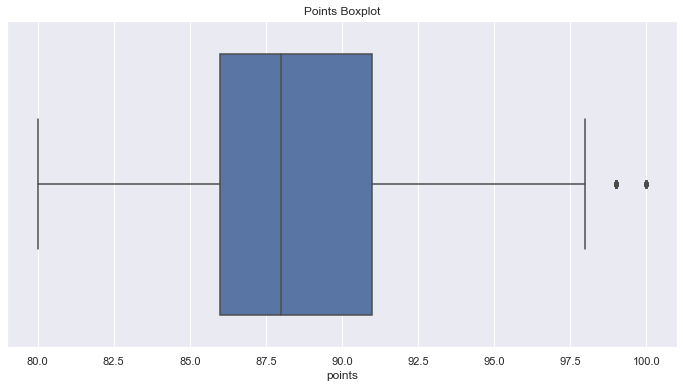

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df.points)
plt.title("Points Boxplot")
plt.show()

In [10]:
# Best Wines According to Points (Top 20)

In [12]:
top20Points = df.sort_values(by="points", ascending=False).head(20)

for i in range(20):
    print("{} / {} / {} / $ {}".format(top20Points.title.values[i], top20Points.country.values[i], top20Points.province.values[i], top20Points.price.values[i]))
    print("========================")

Quinta do Noval 2011 Nacional Vintage  (Port) / Portugal / Port / $ 650.0
Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne) / France / Champagne / $ 617.0
Charles Smith 2006 Royal City Syrah (Columbia Valley (WA)) / US / Washington / $ 80.0
Biondi Santi 2010 Riserva  (Brunello di Montalcino) / Italy / Tuscany / $ 550.0
Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA)) / US / Washington / $ 80.0
Verité 2007 La Muse Red (Sonoma County) / US / California / $ 450.0
Casa Ferreirinha 2008 Barca-Velha Red (Douro) / Portugal / Douro / $ 450.0
Château Léoville Las Cases 2010  Saint-Julien / France / Bordeaux / $ 359.0
Château Cheval Blanc 2010  Saint-Émilion / France / Bordeaux / $ 1500.0
Casanova di Neri 2007 Cerretalto  (Brunello di Montalcino) / Italy / Tuscany / $ 270.0
Château Lafite Rothschild 2010  Pauillac / France / Bordeaux / $ 1500.0
Château Léoville Barton 2010  Saint-Julien / France / Bordeaux / $ 150.0
Chambers Rosewood Vineyards NV Rare Muscat (Rutherglen) / 

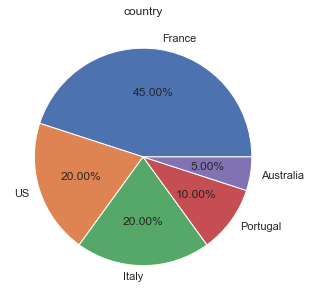

In [25]:
plt.figure(figsize=(10,5))
top20Points['country'].value_counts().plot( kind='pie', autopct='%1.2f%%' )
plt.title('country')  # 圖標題
plt.ylabel('')
plt.show()

<AxesSubplot:ylabel='Frequency'>

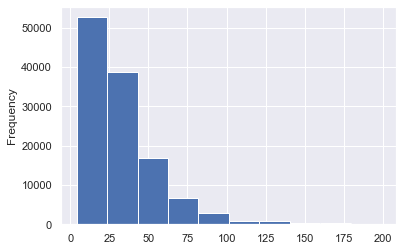

In [26]:
df[df['price'] < 200]['price'].plot.hist()

<AxesSubplot:xlabel='variety', ylabel='points'>

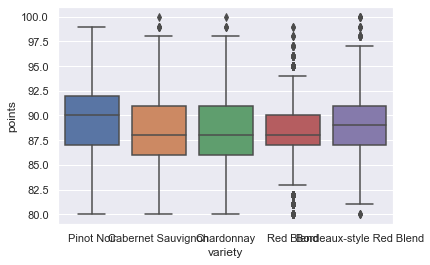

In [31]:
df_variety = df[df.variety.isin(df.variety.value_counts().head(5).index)]

sns.boxplot(x='variety', y='points', data=df_variety)

In [ ]:
# https://www.kaggle.com/thebrownviking20/topic-modelling-with-spacy-and-scikit-learn
# use spicy